# Linear Regression Analysis of GDP and Life Expectancy

## Step 1: Import Libraries

In [243]:
# import necessary libtraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from os.path import join
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [244]:
# set style for better visualization

plt.style.use('seaborn-v0_8')

## Step 2: Load and clean the data

In [245]:
# create path

path = r'../Data_Extract_From_World_Development_Indicators/Data'

In [246]:
# load data

df_clean = pd.read_csv('Clean_Data.csv')

In [247]:
# display basic information about the dataset

print("Dataset shape:", df_clean.shape)
print("/nFirst 20 rows:")
print(df_clean.head())
print("/nColumn names:")
print(df_clean.columns.tolist())
print("/nData types:")
print(df_clean.dtypes)
print("/nMissing values:")
print(df_clean.isnull().sum())

Dataset shape: (4737, 9)
/nFirst 20 rows:
  Country Name Country Code  Year  ...  GDP_growth  LE_change  Internet_growth
0  Afghanistan          AFG  2000  ...         NaN        NaN              NaN
1  Afghanistan          AFG  2001  ...  -20.707691      0.506              NaN
2  Afghanistan          AFG  2002  ...   29.016069      0.714        -3.389831
3  Afghanistan          AFG  2003  ...   11.129686      0.946      1827.631579
4  Afghanistan          AFG  2004  ...   11.511243      0.639        20.591581

[5 rows x 9 columns]
/nColumn names:
['Country Name', 'Country Code', 'Year', 'GDP per capita (current US$)', 'Individuals using the Internet (% of population)', 'Life expectancy at birth, total (years)', 'GDP_growth', 'LE_change', 'Internet_growth']
/nData types:
Country Name                                         object
Country Code                                         object
Year                                                  int64
GDP per capita (current US$)          

In [248]:
# clean data by removing missing values

df_clean = df_clean.dropna(subset=['GDP per capita (current US$)',
                                    'Individuals using the Internet (% of population)',
                                    'Life expectancy at birth, total (years)']).copy()

In [249]:
# convert relevant columns to numeric and handling errors

df_clean['GDP per capita (current US$)'] = pd.to_numeric(df_clean['GDP per capita (current US$)'], errors='coerce')
df_clean['Individuals using the Internet (% of population)'] = pd.to_numeric(df_clean['Individuals using the Internet (% of population)'], errors='coerce')
df_clean['Life expectancy at birth, total (years)'] = pd.to_numeric(df_clean['Life expectancy at birth, total (years)'], errors='coerce')

In [250]:
# drop remaining rows with NaN values

df_clean = df_clean.dropna(subset=['GDP per capita (current US$)',
                                   'Individuals using the Internet (% of population)',
                                   'Life expectancy at birth, total (years)'])

In [251]:
# cross check for results

print("Cleaned dataset shape:", df_clean.shape)
print("Remaining missing values:")
print(df_clean[['GDP per capita (current US$)',
                'Individuals using the Internet (% of population)',
                'Life expectancy at birth, total (years)']].isnull().sum())


Cleaned dataset shape: (3307, 9)
Remaining missing values:
GDP per capita (current US$)                        0
Individuals using the Internet (% of population)    0
Life expectancy at birth, total (years)             0
dtype: int64


## Step 3: Explore data visually

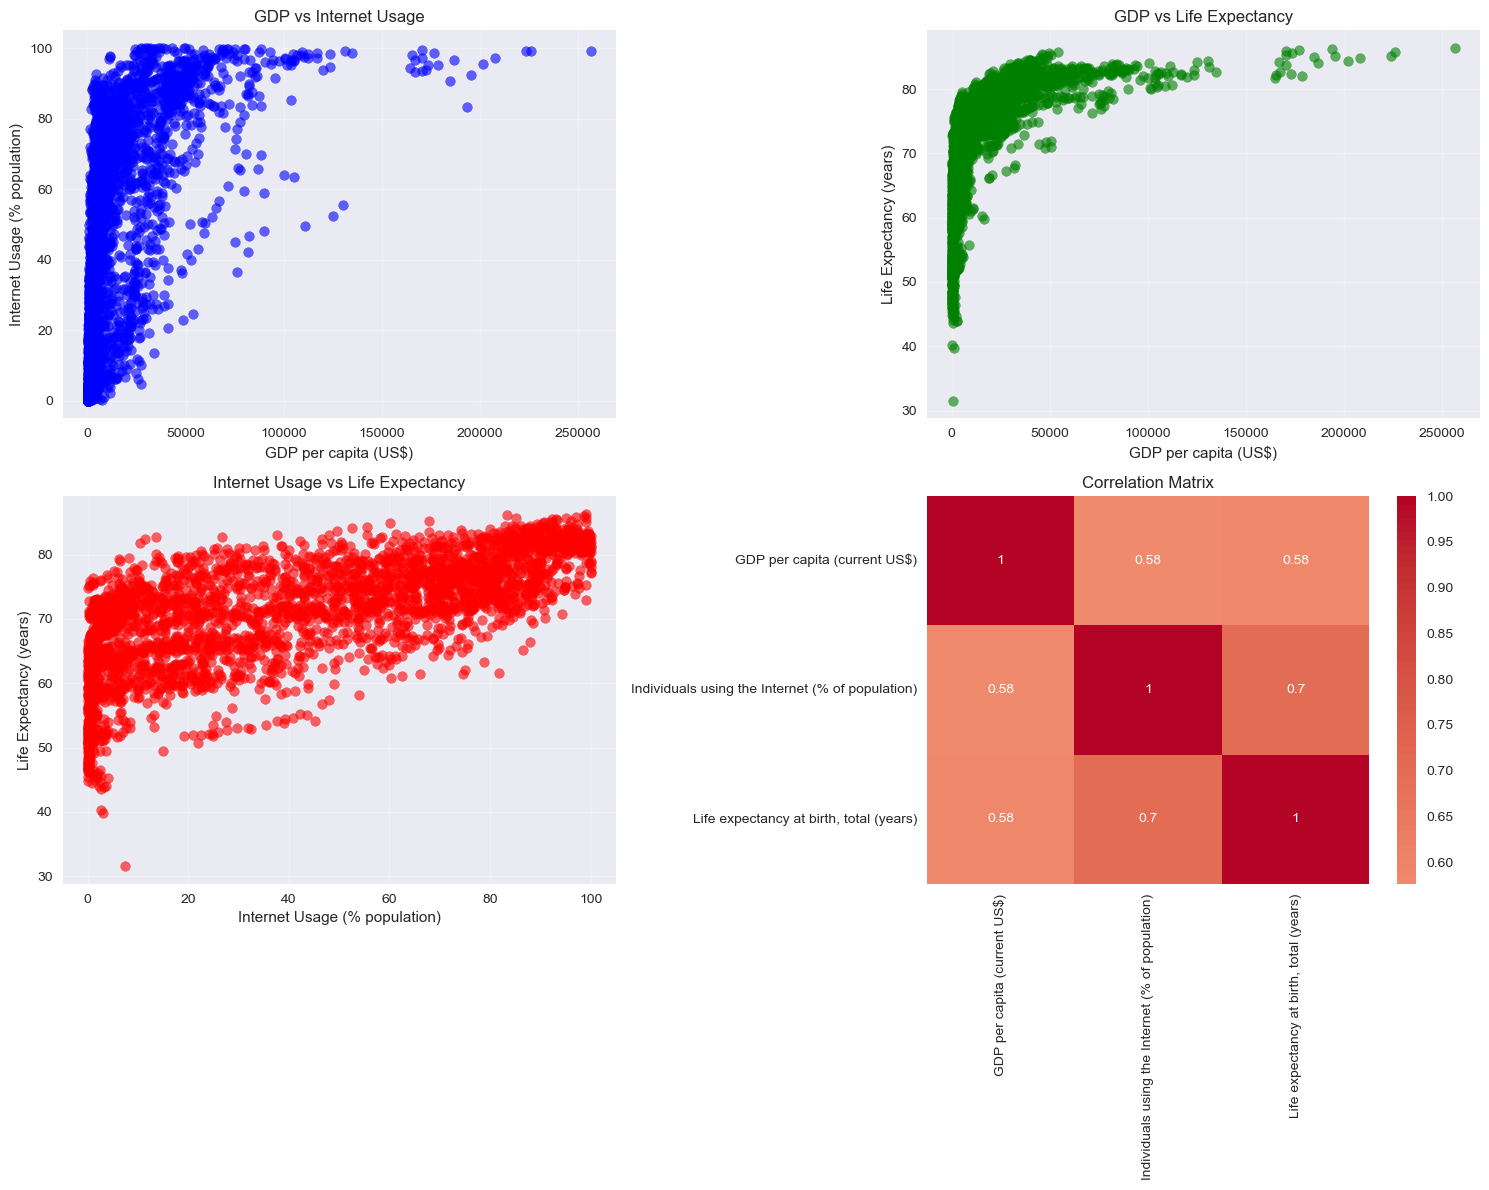

Correlation Matrix:
                                                  GDP per capita (current US$)  ...  Life expectancy at birth, total (years)
GDP per capita (current US$)                                          1.000000  ...                                 0.581329
Individuals using the Internet (% of population)                      0.576116  ...                                 0.701848
Life expectancy at birth, total (years)                               0.581329  ...                                 1.000000

[3 rows x 3 columns]


In [252]:
# Create scatterplots to explore relationships between variables

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# GDP vs Internet Usage
axes[0,0].scatter(df_clean['GDP per capita (current US$)'], 
                 df_clean['Individuals using the Internet (% of population)'], 
                 alpha=0.6, color='blue')
axes[0,0].set_xlabel('GDP per capita (US$)')
axes[0,0].set_ylabel('Internet Usage (% population)')
axes[0,0].set_title('GDP vs Internet Usage')
axes[0,0].grid(True, alpha=0.3)

# GDP vs Life Expectancy
axes[0,1].scatter(df_clean['GDP per capita (current US$)'], 
                 df_clean['Life expectancy at birth, total (years)'], 
                 alpha=0.6, color='green')
axes[0,1].set_xlabel('GDP per capita (US$)')
axes[0,1].set_ylabel('Life Expectancy (years)')
axes[0,1].set_title('GDP vs Life Expectancy')
axes[0,1].grid(True, alpha=0.3)

# Internet Usage vs Life Expectancy
axes[1,0].scatter(df_clean['Individuals using the Internet (% of population)'], 
                 df_clean['Life expectancy at birth, total (years)'], 
                 alpha=0.6, color='red')
axes[1,0].set_xlabel('Internet Usage (% population)')
axes[1,0].set_ylabel('Life Expectancy (years)')
axes[1,0].set_title('Internet Usage vs Life Expectancy')
axes[1,0].grid(True, alpha=0.3)

# Correlation heatmap
corr_matrix = df_clean[['GDP per capita (current US$)', 
                       'Individuals using the Internet (% of population)', 
                       'Life expectancy at birth, total (years)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
axes[1,1].set_title('Correlation Matrix')

plt.tight_layout()
plt.savefig('Relationship between variables')
plt.show()

# Display correlation values
print("Correlation Matrix:")
print(corr_matrix)

## Step 4: State Hypothesis

## Hypothesis

Based on the visual exploration, I hypothesize that there is a positive linear relationship between 
**GDP per capita** and **Life expectancy**. 

Specifically:
- **Null Hypothesis (H0)**: There is no significant relationship between GDP per capita and life expectancy.
- **Alternative Hypothesis (H1)**: There is a significant positive relationship between GDP per capita and life expectancy.

This hypothesis is supported by economic theory and the visible trend in the scatterplot, where countries 
with higher GDP per capita tend to have higher life expectancies.

## Step 5: Reshape variables into NumPy arrays

In [253]:
# Reshape variables into NumPy arrays

X = df_clean['GDP per capita (current US$)'].values.reshape(-1, 1)  # Independent variable
y = df_clean['Life expectancy at birth, total (years)'].values    # Dependent variable

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 values of X:", X[:5].flatten())
print("First 5 values of y:", y[:5])

Shape of X: (3307, 1)
Shape of y: (3307,)

First 5 values of X: [138.70682168 178.95408838 198.87111573 221.76365387 254.18424915]
First 5 values of y: [55.511 56.225 57.171 57.81  58.247]


In [254]:
X

array([[ 138.70682168],
       [ 178.95408838],
       [ 198.87111573],
       ...,
       [1724.38727102],
       [2040.54658705],
       [2156.03409323]])

## Step 6: Split data into training and test sets

In [255]:
#Split data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Proportion of data in training set: {:.1%}".format(X_train.shape[0] / len(X)))
print("Proportion of data in test set: {:.1%}".format(X_test.shape[0] / len(X)))

Training set size: 2645
Test set size: 662
Proportion of data in training set: 80.0%
Proportion of data in test set: 20.0%


## Step 7: Regression Model

In [256]:
# Create and fit linear regression model

model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Display model coefficients
print("Model intercept (b0):", model.intercept_)
print("Model coefficient (b1):", model.coef_[0])
print("\nRegression equation: y = {:.4f} + {:.6f} * GDP".format(model.intercept_, model.coef_[0]))

Model intercept (b0): 67.7001252256274
Model coefficient (b1): 0.00020817986448084955

Regression equation: y = 67.7001 + 0.000208 * GDP


In [257]:
# Create predictions for y on the test set
y_pred = model.predict(X_test)

# Create a dataframe to compare actual vs predicted values
results_df = pd.DataFrame({
    'Actual_GDP': X_test.flatten(),
    'Actual_Life_Expectancy': y_test,
    'Predicted_Life_Expectancy': y_pred,
    'Residual': y_test - y_pred
})

print("Comparison of actual vs predicted values")
print(results_df.head(50))

Comparison of actual vs predicted values
       Actual_GDP  Actual_Life_Expectancy  Predicted_Life_Expectancy   Residual
0    34063.578403               82.718000                  74.791476   7.926524
1     2439.351894               63.662000                  68.207949  -4.545949
2      747.968004               65.257000                  67.855837  -2.598837
3    17913.492807               69.888000                  71.429354  -1.541354
4    26178.753761               72.994000                  73.150015  -0.156015
5    13082.300656               74.253659                  70.423597   3.830062
6    34065.643896               83.996341                  74.791906   9.204435
7    40415.956765               84.356341                  76.113914   8.242428
8     3991.776708               73.820000                  68.531133   5.288867
9     1189.514793               68.117000                  67.947758   0.169242
10    1422.273318               64.108000                  67.996214  -3.888214

## Step 8: Create a plot showing the regression

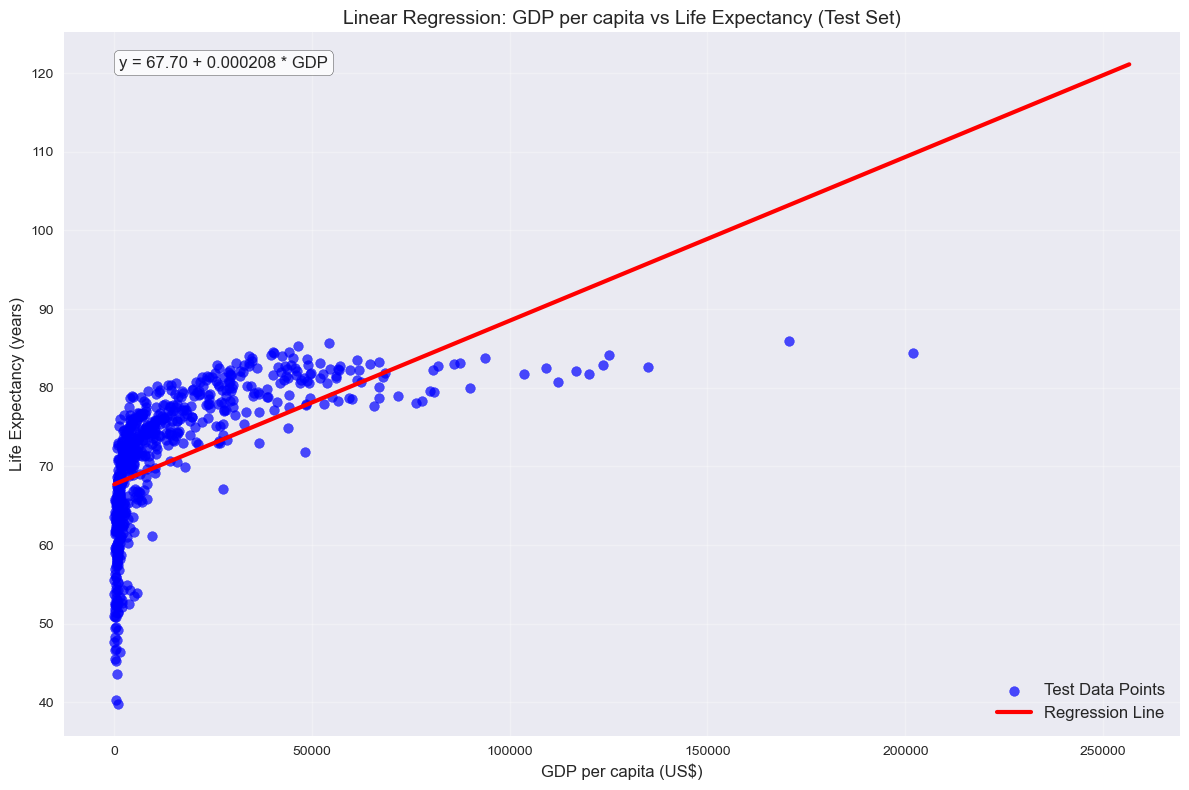

In [258]:
# Create a plot showing the regression line on the test set

plt.figure(figsize=(12, 8))

# Plot test data points
plt.scatter(X_test, y_test, alpha=0.7, color='blue', label='Test Data Points')

# Plot regression line
x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range = model.predict(x_range)
plt.plot(x_range, y_range, color='red', linewidth=3, label='Regression Line')

plt.xlabel('GDP per capita (US$)', fontsize=12)
plt.ylabel('Life Expectancy (years)', fontsize=12)
plt.title('Linear Regression: GDP per capita vs Life Expectancy (Test Set)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add regression equation to plot
equation = f'y = {model.intercept_:.2f} + {model.coef_[0]:.6f} * GDP'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.savefig('Linear_Regression_Analysis.png')
plt.show()

## Step 9: Interpretations


The regression line appears to capture the general positive trend between GDP per capita and life expectancy. 
However, there are several observations:

1. **Overall Trend**: The line shows a positive slope, indicating that as GDP per capita increases, 
   life expectancy tends to increase, which aligns with our hypothesis.

2. **Fit Quality**: The line seems to fit reasonably well for mid-range GDP values but shows more 
   variability at both extremes (very low and very high GDP values).

3. **Variability**: There is considerable scatter around the regression line, suggesting that while 
   GDP is a significant predictor, there are other factors influencing life expectancy that are 
   not captured by this simple linear model.

4. **Potential Non-linearity**: The relationship might not be perfectly linear, especially at 
   higher GDP levels where increases in wealth may have diminishing returns on life expectancy.

## Step 10: Model Performance Statistics

In [259]:
# Check model performance statistics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Statistics:")
print("=" * 40)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.4f}")

Model Performance Statistics:
Mean Squared Error (MSE): 49.6759
R-squared (R²) Score: 0.3539
Root Mean Squared Error (RMSE): 7.0481


In [260]:
# Additional statistics

print(f"\nAdditional Statistics:")
print(f"Mean of Actual Life Expectancy: {y_test.mean():.4f}")
print(f"Standard Deviation of Actual Life Expectancy: {y_test.std():.4f}")
print(f"RMSE as % of Mean: {(np.sqrt(mse)/y_test.mean())*100:.2f}%")


Additional Statistics:
Mean of Actual Life Expectancy: 71.3617
Standard Deviation of Actual Life Expectancy: 8.7687
RMSE as % of Mean: 9.88%


## Step 11: Compare Predictions

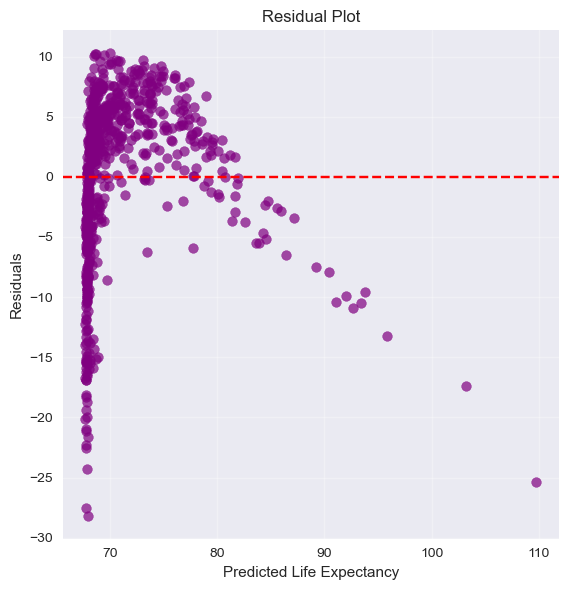

In [275]:
# Detailed comparison of predicted vs actual values

plt.figure(figsize=(16, 6))

# Subplot 1: Residual plot
plt.subplot(1, 3, 1)
plt.scatter(y_pred, results_df['Residual'], alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Life Expectancy')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, alpha=0.3)
plt.savefig('Residual Plot')
plt.tight_layout()
plt.show()

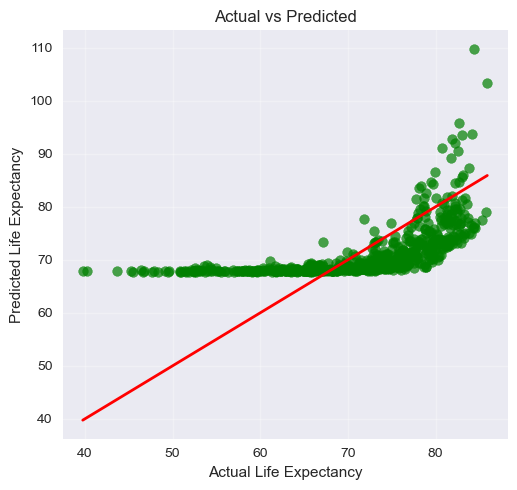

In [274]:
# Subplot 2: Actual vs Predicted scatter

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'red', lw=2)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted')
plt.grid(True, alpha=0.3)
plt.savefig('Life Expectency Predictions')
plt.tight_layout()
plt.show()

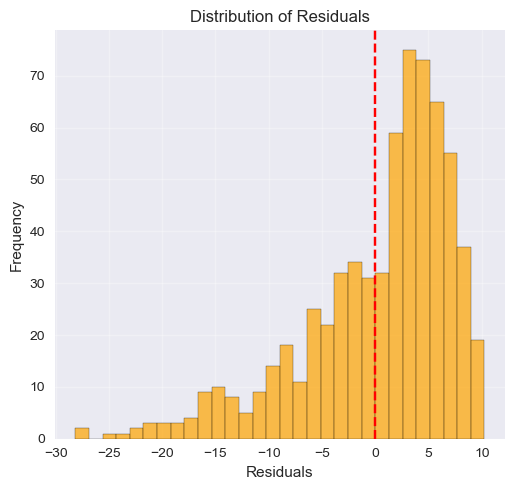

In [273]:
# Subplot 3: Distribution of residuals

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.hist(results_df['Residual'], bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True, alpha=0.3)
plt.savefig('Distribution of Residuals')
plt.tight_layout()
plt.show()

## Step 12: Model Performance Evaluation

### Model performance evaluations 

The linear regression model shows moderate performance in predicting life expectancy based on GDP per capita:

### Strengths:
- **R² Score of {:.4f}**: This indicates that approximately {:.1f}% of the variance in life expectancy 
  can be explained by GDP per capita alone, which is reasonable for a single-predictor model.

- **Positive Relationship Confirmed**: The positive coefficient confirms our hypothesis that higher GDP 
  is associated with higher life expectancy.

### Limitations:
- **Substantial Unexplained Variance**: About {:.1f}% of the variance remains unexplained, indicating 
  that other factors (healthcare quality, education, sanitation, etc.) significantly influence life expectancy.

- **Potential Heteroscedasticity**: The residual plot shows some pattern, suggesting that the variance 
  of errors might not be constant across all GDP levels.

- **Non-linear Patterns**: The relationship might be better captured by a non-linear model or by 
  including additional predictors.

### Practical Significance:
- The model suggests that for every $1,000 increase in GDP per capita, life expectancy increases by 
  approximately {:.2f} years on average.format(r2, r2*100, (1-r2)*100, model.coef_[0]*1000)

## Step 13: Reflections on Data Bias

### Potential Biases:

1. **Selection Biases**: The dataste inclueds countries with available data which may overpresent developed nations with better data collection system.
   
2.  **Temporal Bias**: Data spans multiple years (2000-2024), but economic conditions and healthcare systems have evolved differently across countries during this period.

3. **Measurement Bias**: GDP per capita might not fully capture economic well-being (doesn't account for income inequality, cost of living differences, etc.).

4. **Cultural and Regional Bias**: The relationship between GDP and life expectancy might vary significantly across different regions and cultural contexts.

### Mitigation Considerations:
- Include regional dummy variables in a more complex model.
- Consider using GDP PPP (Purchasing Power Parity) instead of nominal GDP.
- Account for time effects by including year fixed effects.
- Add control variables like healthcare spending, education levels, and sanitation access.

### Ethical Considerations:
- The model should not be used to make deterministic predictions about individual countries.
- Economic development should not be pursued at the expense of other health determinants.
- The relationship is correlational not necessarily causal.

In [276]:
# Step 16: Save the notebook and final summary
print("Analysis completed successfully!")
print("\nSummary of key findings:")
print(f"- Dataset: {df_clean.shape[0]} observations after cleaning")
print(f"- Relationship: Positive correlation between GDP and life expectancy")
print(f"- Model R²: {r2:.4f} ({r2*100:.1f}% variance explained)")
print(f"- Coefficient: Each $1,000 GDP increase associated with {model.coef_[0]*1000:.2f} year life expectancy increase")
print(f"- Prediction error: RMSE of {np.sqrt(mse):.2f} years")

# Save results to CSV for future reference
results_df.to_csv('regression_results.csv', index=False)

Analysis completed successfully!

Summary of key findings:
- Dataset: 3307 observations after cleaning
- Relationship: Positive correlation between GDP and life expectancy
- Model R²: 0.3539 (35.4% variance explained)
- Coefficient: Each $1,000 GDP increase associated with 0.21 year life expectancy increase
- Prediction error: RMSE of 7.05 years
